# Clutter filter

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg, signal

In [229]:
def square(t, T):
    return np.where(np.logical_and(t >= 0, t < T), 1, 0)

## Signal

In [230]:
N = 1000
n = np.linspace(0, 10, N)

# Stationary targets
M = 10

Reference signal
$x_r(n)$

In [231]:
xr = square(n, .5) * np.random.rand(N)
xr.shape

(1000,)

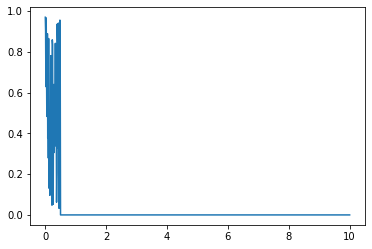

In [232]:
plt.plot(n, xr);

---
## Matrix

- $\textbf{X}_r$

In [233]:
Xr =  np.matrix([np.roll(xr, i*100) for i in range(M)]).T
Xr.shape

(1000, 10)

- $\textbf{C}^s$ 

In [234]:
Cs = np.matrix(np.random.rand(M,1))
# Cs[0] = 1
Cs.shape

(10, 1)

- $\textbf{X}_e$

In [235]:
Xe = Xr@Cs
Xe.shape

(1000, 1)

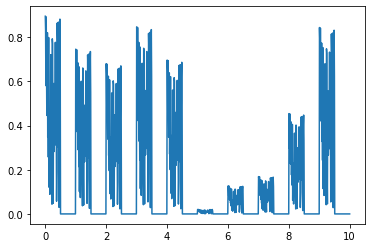

In [236]:
plt.plot(n,Xe);

- $\hat{\textbf{C}}^s = (\textbf{X}^H_r \textbf{X}_r )^{-1} \textbf{X}^H_r \textbf{X}_e$

In [240]:
Cs_hat = (Xr.H @ Xr).I @ Xr.H @ Xe
Cs_hat.shape

(10, 1)

In [238]:
Xef = Xe - (Xr@Cs_hat)
Xef.shape

(1000, 1)

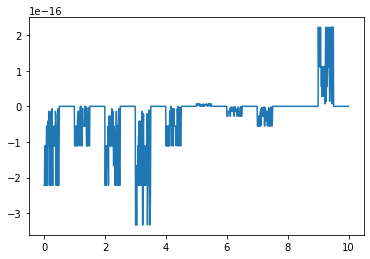

In [239]:
plt.plot(n, Xef);